In [3]:
import torch
from torch import nn
import numpy as np

# Creating a line model

In [4]:
class LineNetwork(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layers = nn.Sequential(nn.Linear(1, 1))

    def forward(self, x: list) -> nn.Sequential:
        return self.layers(x)

# Train our model

## Preparing our data set to train line model

In [5]:
from torch.utils.data import Dataset, DataLoader
import torch.distributions.uniform as urand

In [6]:
class AlgebricDataSet(Dataset):
    def __init__(self, f, interval: tuple, nsamples: int) -> None:
        X = urand.Uniform(interval[0], interval[1]).sample([nsamples])
        self.data = [(x, f(x)) for x in X]

    def __len__(self) -> int:
        return len(self.data)

    def __getitem__(self, idx: int) -> tuple:
        return self.data[idx]

## Define line function that will be approximate by our model

In [7]:
line = lambda x: 2 * x + 3
interval = (-10, 10)
train_nsamples = 1000
test_nsamples = 1000

## Setting up datasets

In [8]:
train_dataset = AlgebricDataSet(line, interval, train_nsamples)
test_dataset = AlgebricDataSet(line, interval, test_nsamples)

## Setting up dataloader

In [9]:
train_dataloader = DataLoader(train_dataset, train_nsamples, shuffle=True)
test_dataloader = DataLoader(test_dataset, test_nsamples, shuffle=True)

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [11]:
model = LineNetwork().to(device)

## Define loss function and optimizer (Stochastic Gradient Descent)

In [12]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

## Define train function

In [33]:
def train(
    model: LineNetwork,
    dataloader: torch.utils.data.dataloader,
    loss_func: nn.MSELoss,
    optimizer: torch.optim.SGD,
) -> np.float32:
    model.train()
    cumloss = 0.0

    for X, y in dataloader:
        X = X.unsqueeze(1).float().to(device)
        y = y.unsqueeze(1).float().to(device)

        pred = model(X)
        loss_value = loss_func(pred, y)

        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()

        cumloss += loss_value.item()
        return np.float32(cumloss / len(dataloader))

## Define test function

In [34]:
def test(
    model: LineNetwork,
    dataloader: torch.utils.data.dataloader,
    loss_func: nn.MSELoss,
):
    model.eval()
    cumloss = 0.0

    with torch.no_grad():

        for X, y in dataloader:
            X = X.unsqueeze(1).float().to(device)
            y = y.unsqueeze(1).float().to(device)

            pred = model(X)
            loss_value = loss_func(pred, y)

            cumloss += loss_value.item()
    return np.float32(cumloss / len(dataloader))

In [35]:
import matplotlib.pyplot as plt

In [36]:
def plot_comparinson(f, model, interval=(-10, 10), nsamples=10):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.grid(True, which="both")
    ax.spines["left"].set_position("zero")
    ax.spines["right"].set_color("none")
    ax.spines["bottom"].set_position("zero")
    ax.spines["top"].set_color("none")

    samples = np.linspace(interval[0], interval[1], nsamples)
    model.eval()
    with torch.no_grad():
        pred = model(torch.tensor(samples).unsqueeze(1).float().to(device))

    ax.plot(samples, list(map(f, samples)), "o", label="ground truth")
    ax.plot(samples, pred.cpu(), label="model")
    plt.legend()
    plt.show()

Epoch: 0; Train loss: 0.36568397283554077


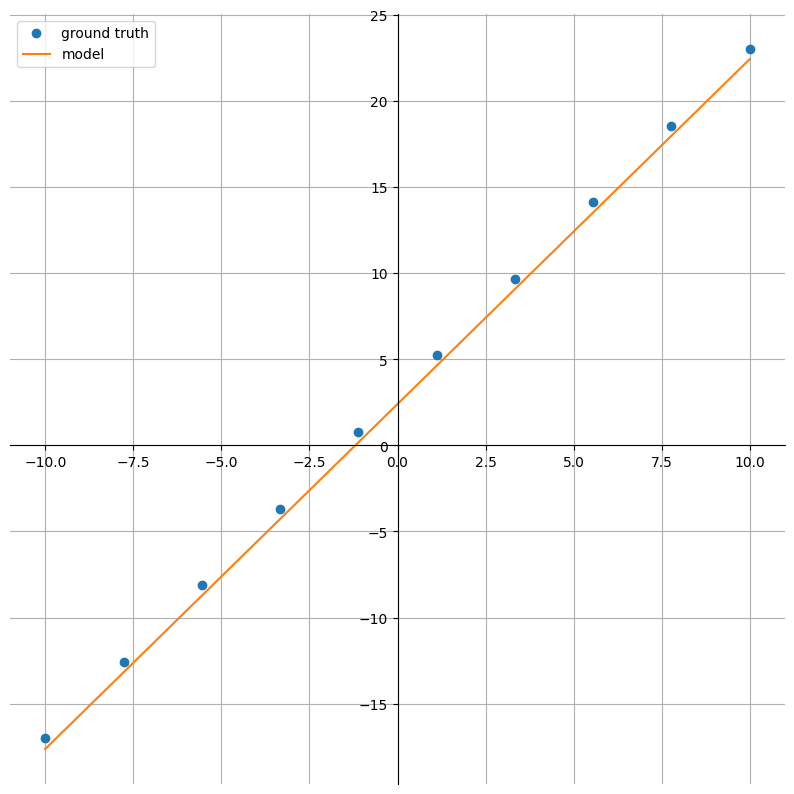

Epoch: 10; Train loss: 0.3513356149196625


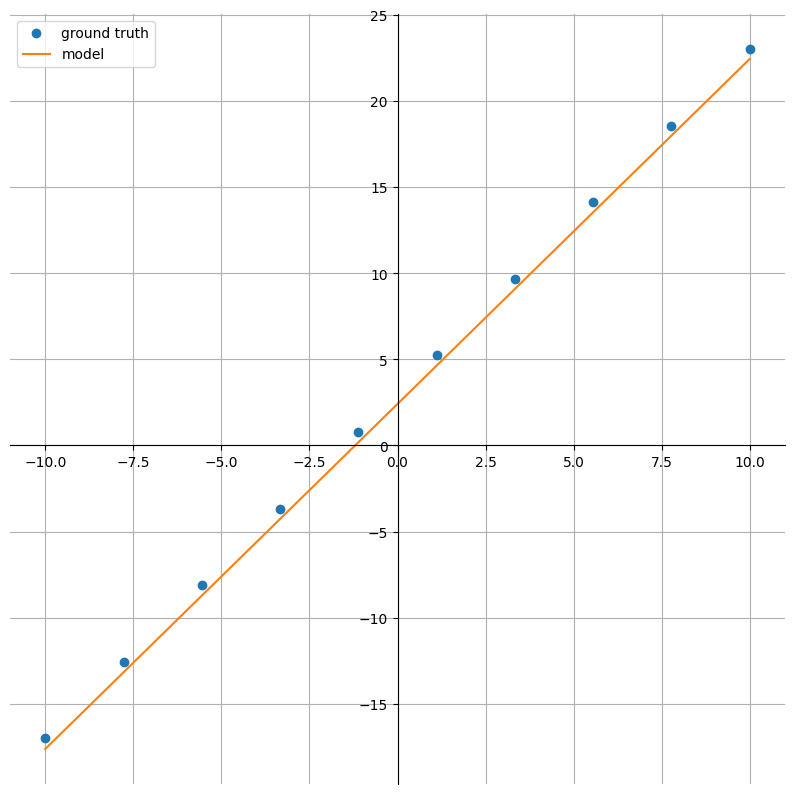

Epoch: 20; Train loss: 0.3375500738620758


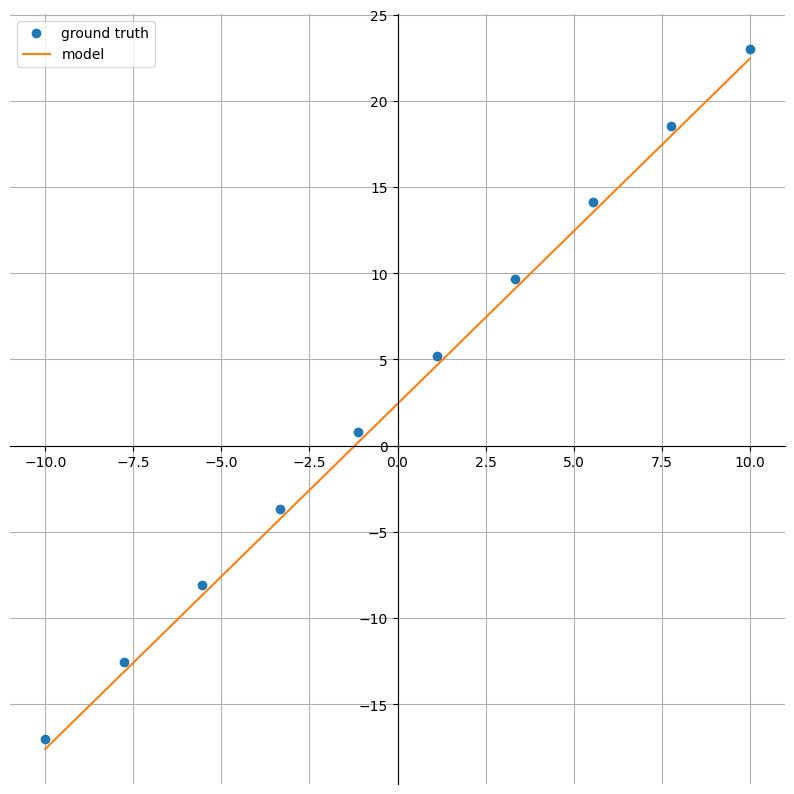

Epoch: 30; Train loss: 0.3243057131767273


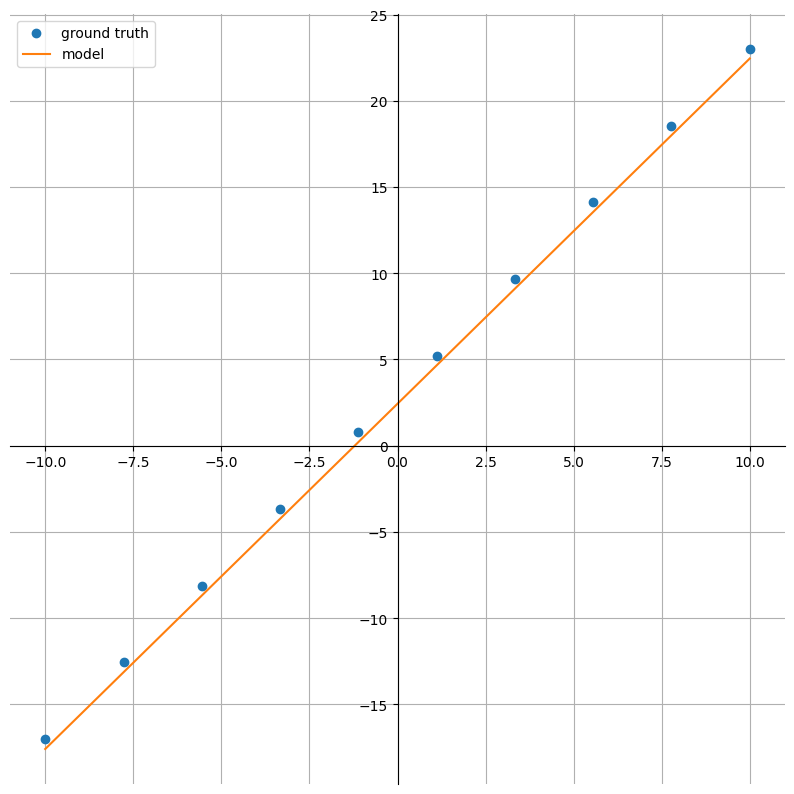

Epoch: 40; Train loss: 0.31158095598220825


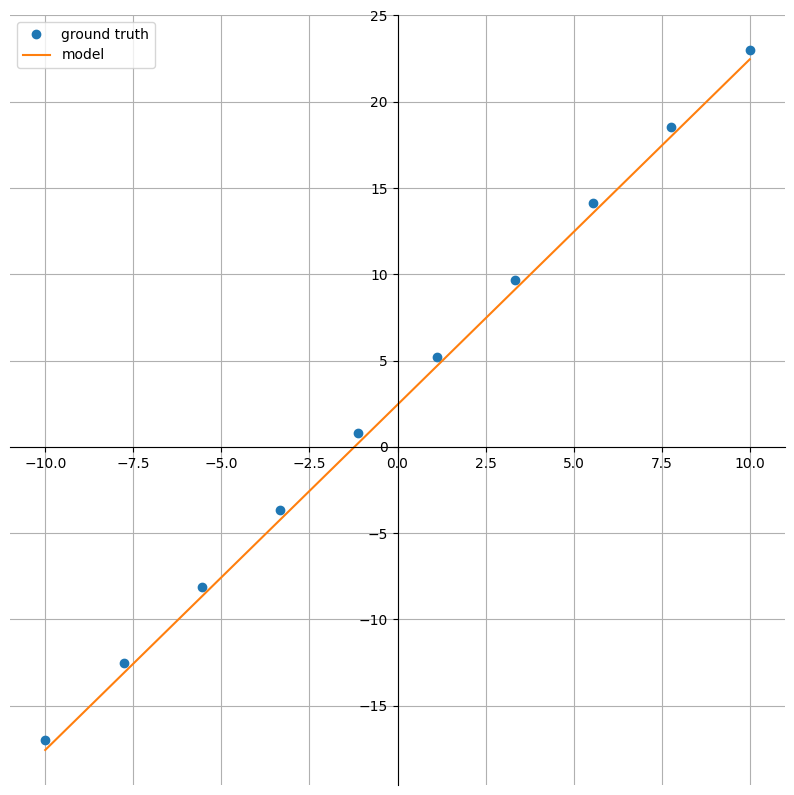

Epoch: 50; Train loss: 0.2993552088737488


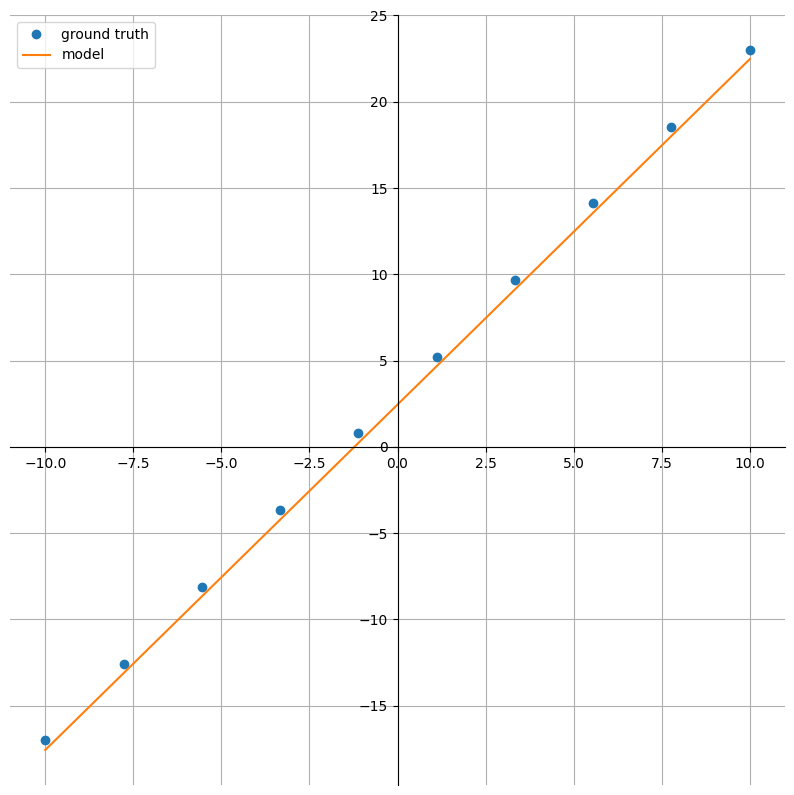

Epoch: 60; Train loss: 0.28760966658592224


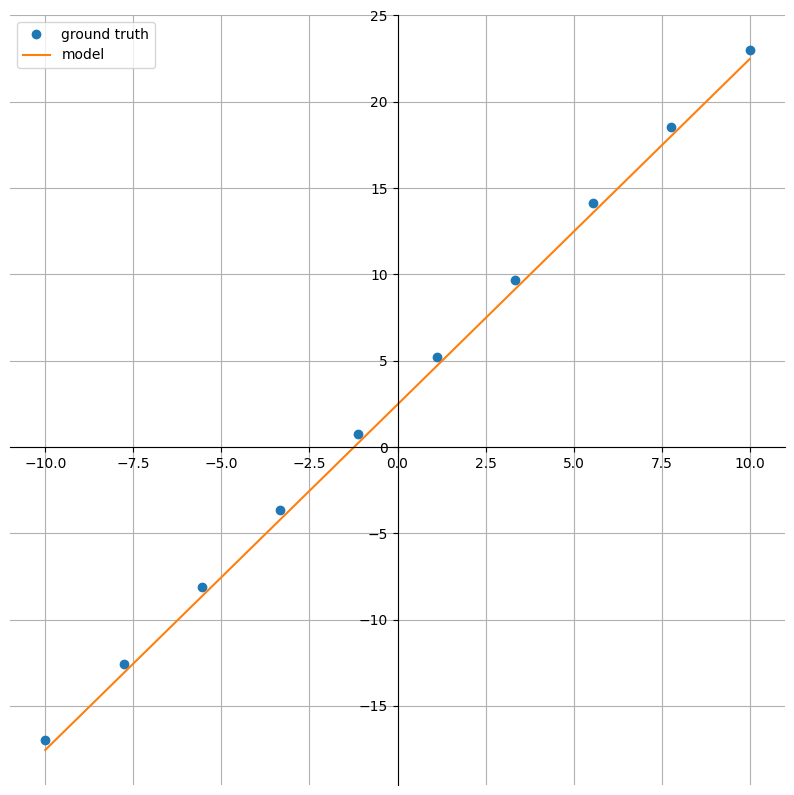

Epoch: 70; Train loss: 0.2763248383998871


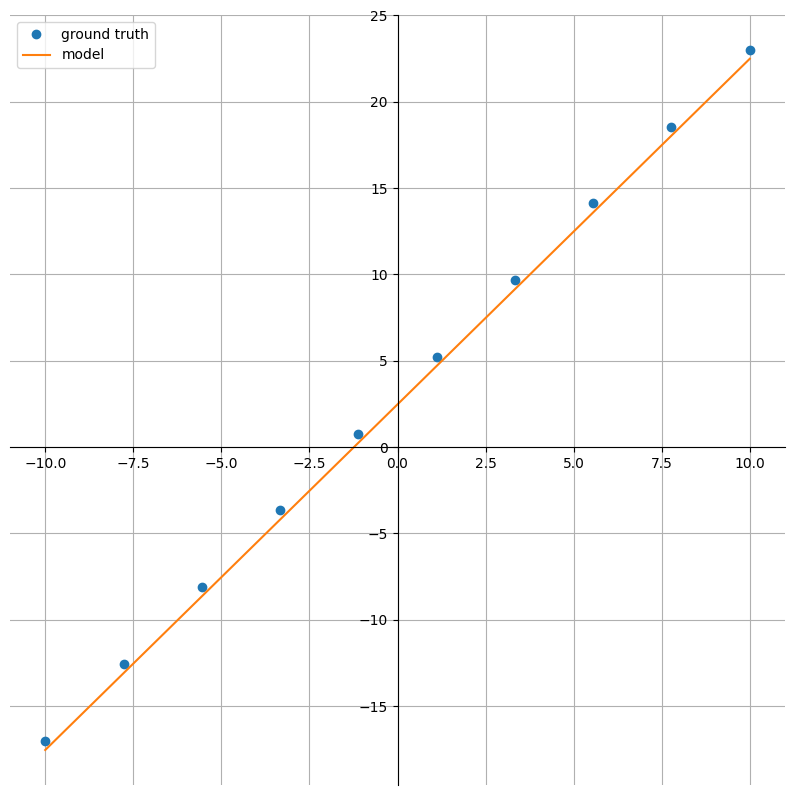

Epoch: 80; Train loss: 0.26548251509666443


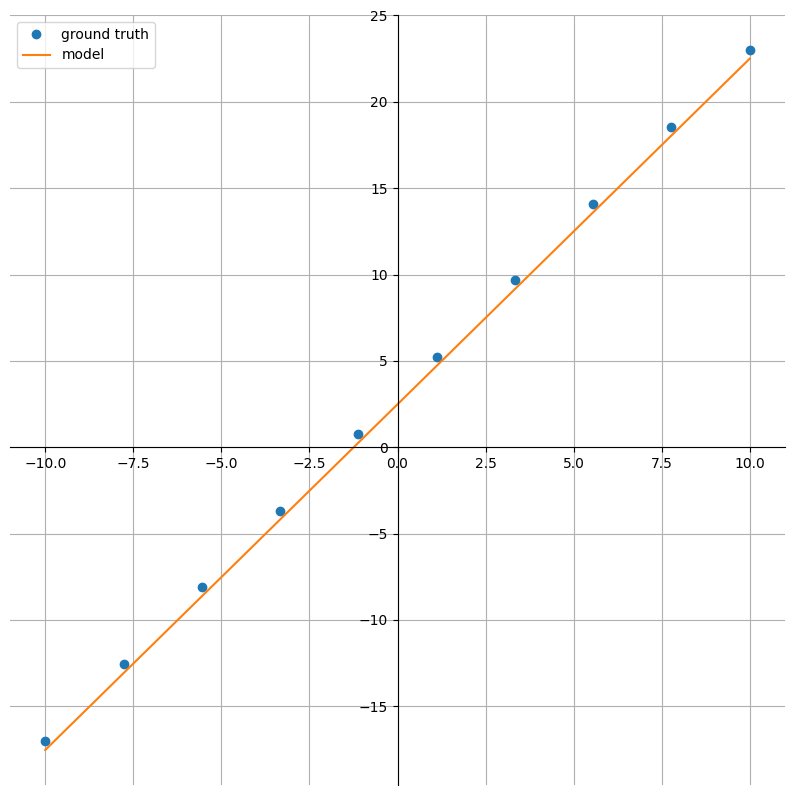

Epoch: 90; Train loss: 0.25506576895713806


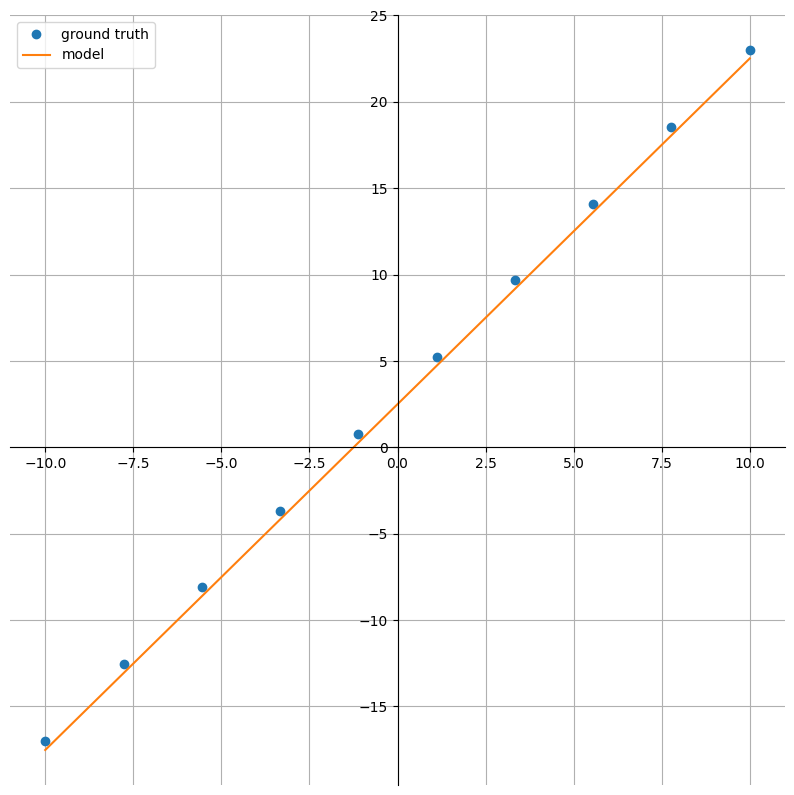

Epoch: 100; Train loss: 0.24505750834941864


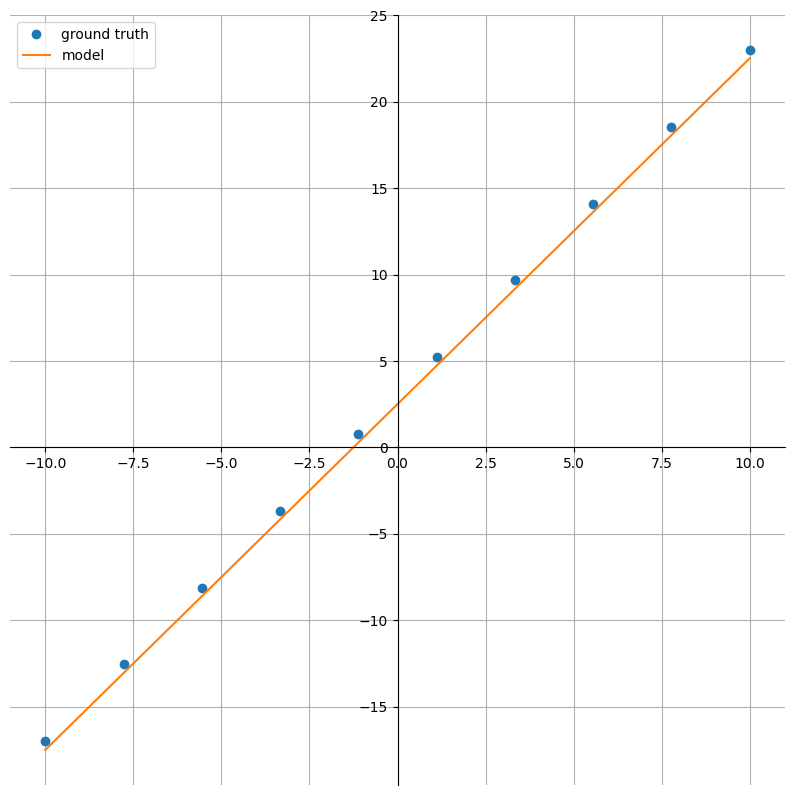

Epoch: 110; Train loss: 0.2354423701763153


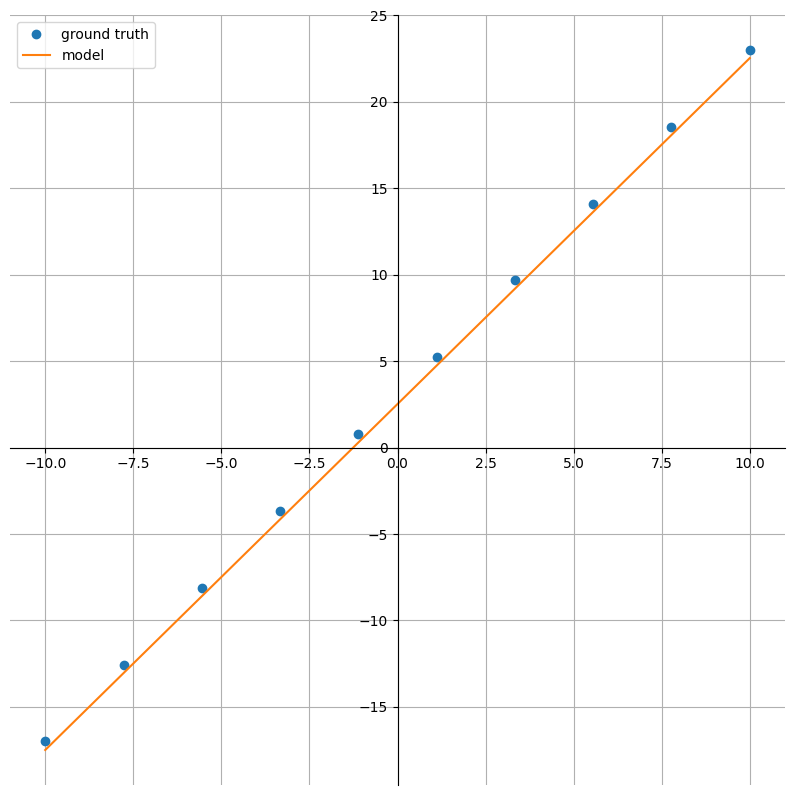

Epoch: 120; Train loss: 0.2262042611837387


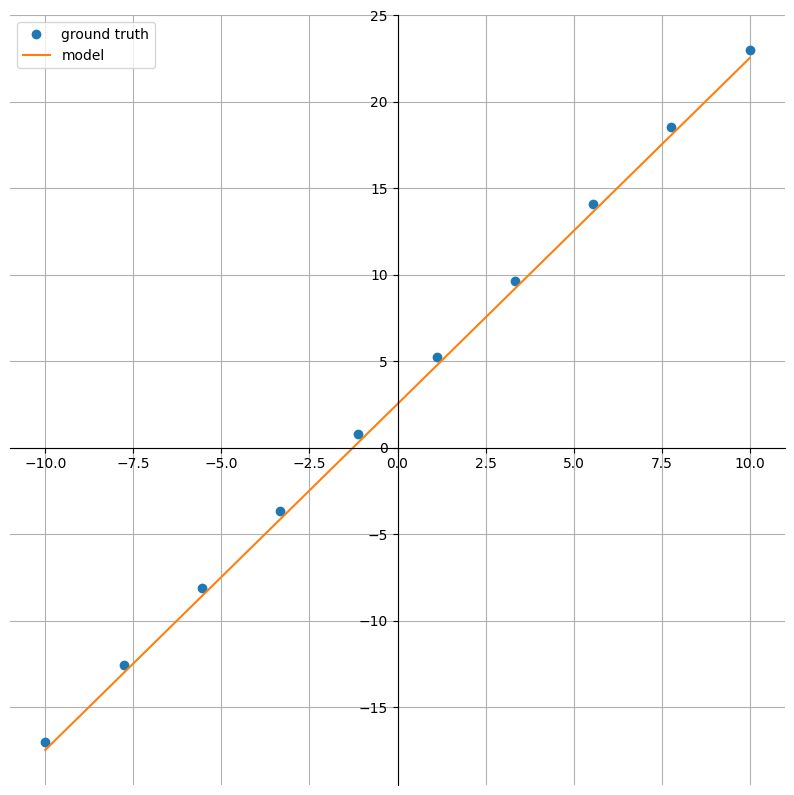

Epoch: 130; Train loss: 0.21732887625694275


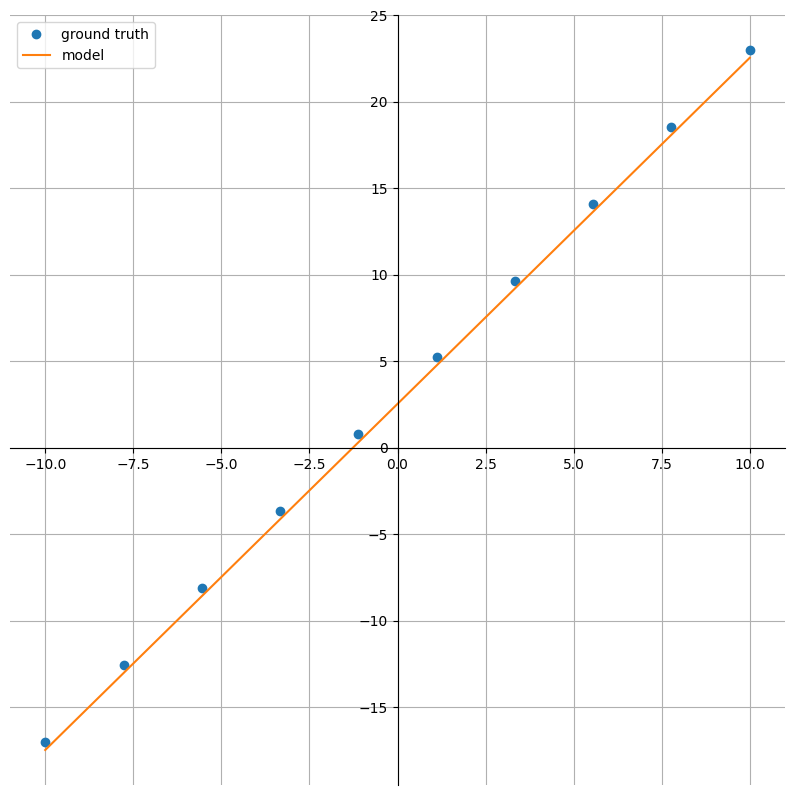

Epoch: 140; Train loss: 0.20880165696144104


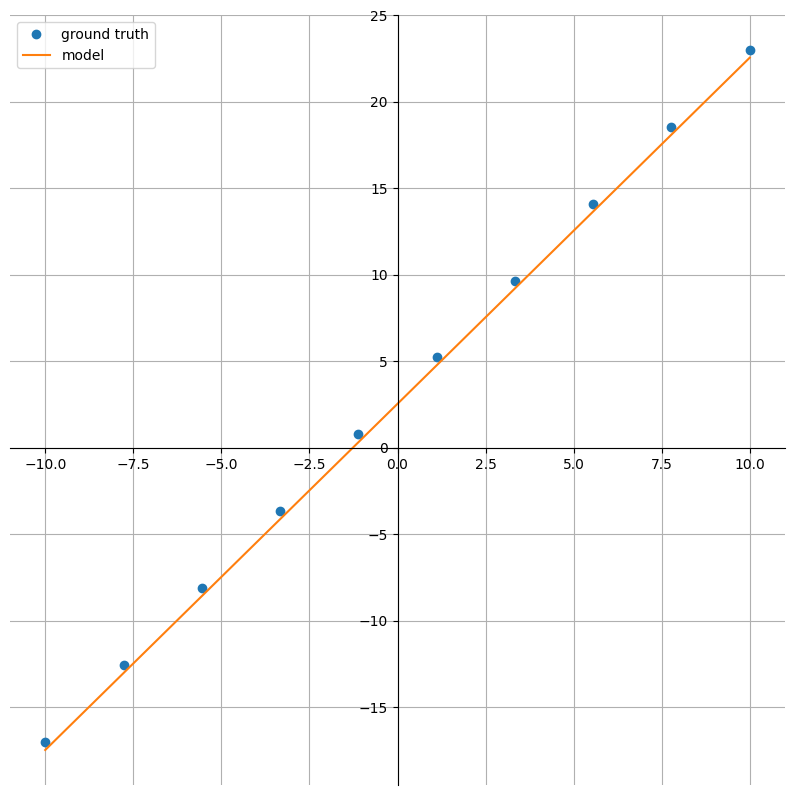

Epoch: 150; Train loss: 0.20060867071151733


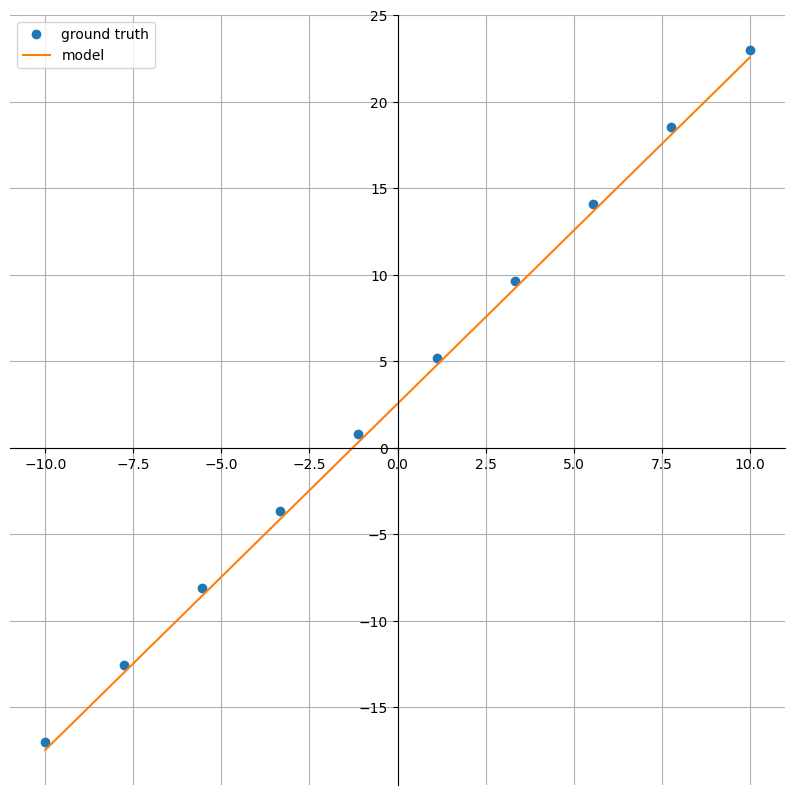

Epoch: 160; Train loss: 0.19273701310157776


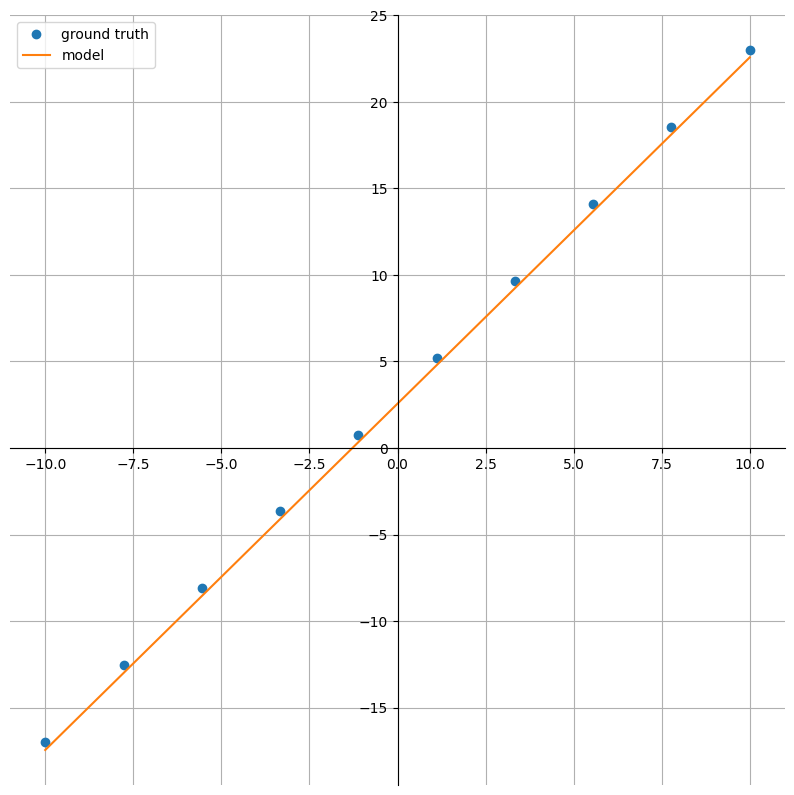

Epoch: 170; Train loss: 0.18517470359802246


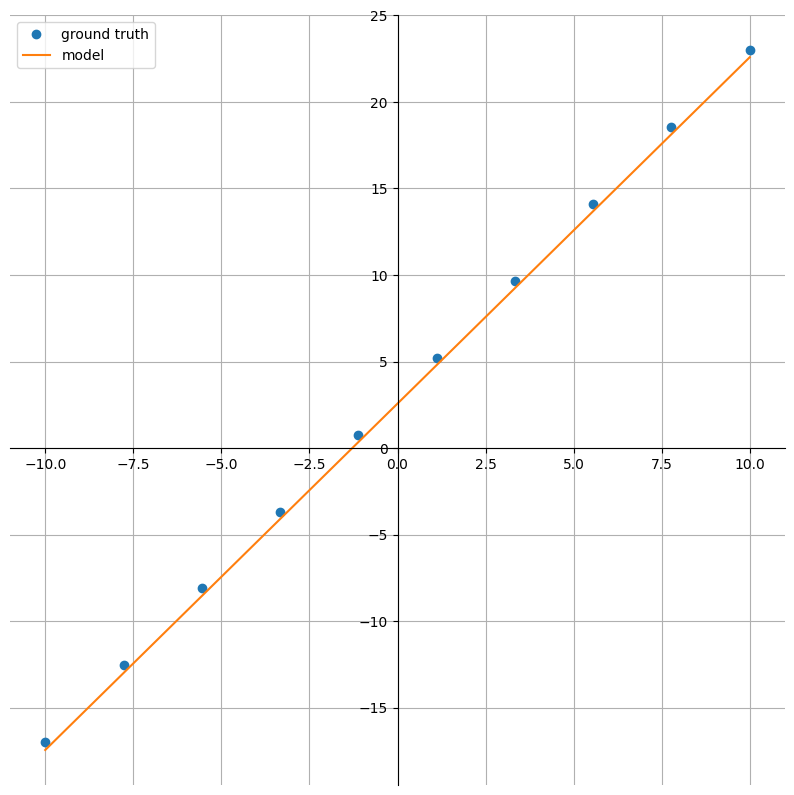

Epoch: 180; Train loss: 0.1779089719057083


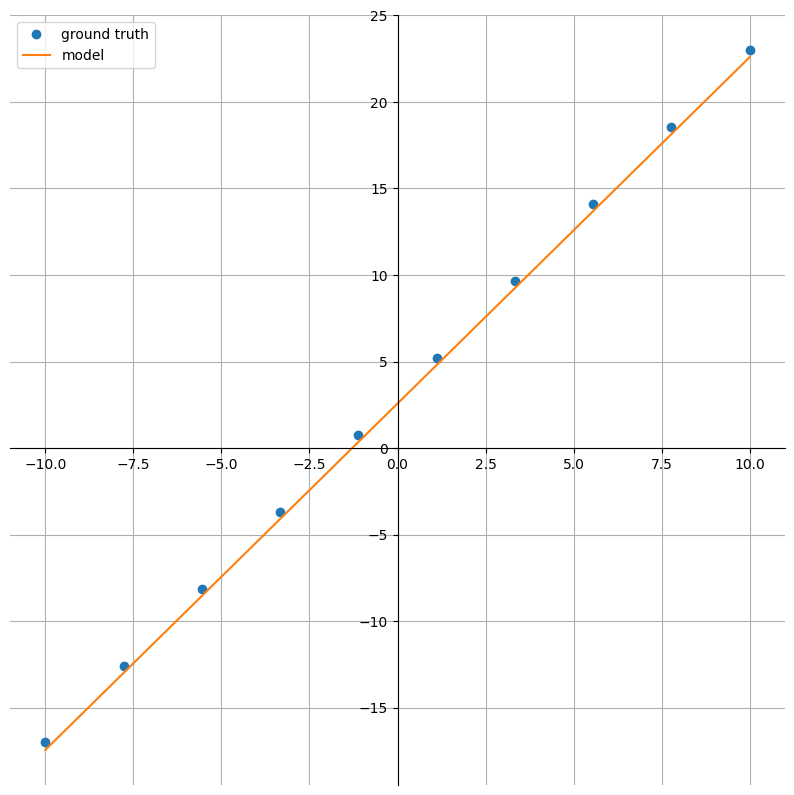

Epoch: 190; Train loss: 0.1709282398223877


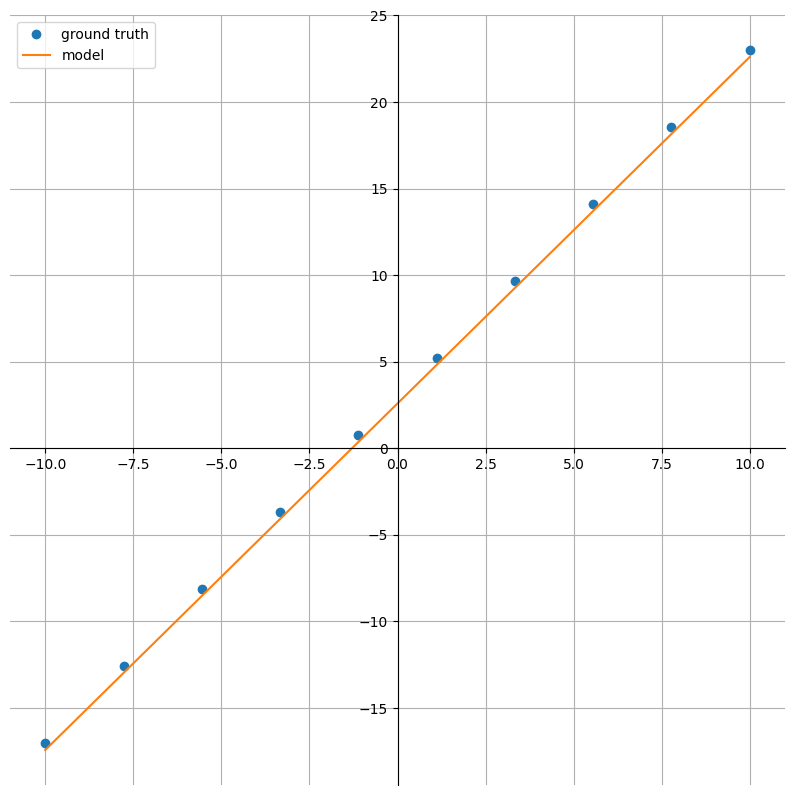

Epoch: 200; Train loss: 0.16422110795974731


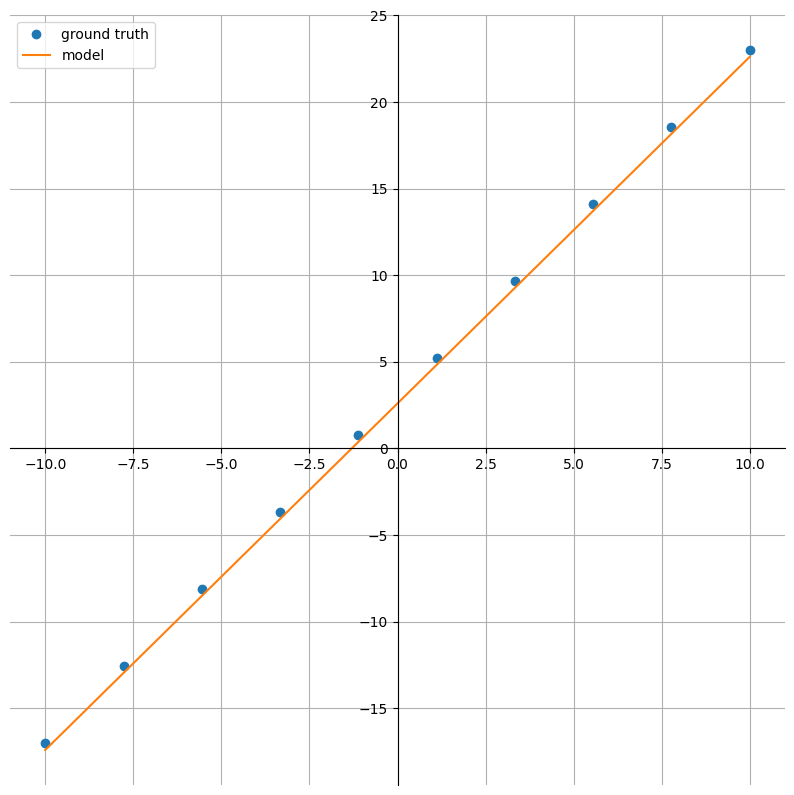

Epoch: 210; Train loss: 0.15777744352817535


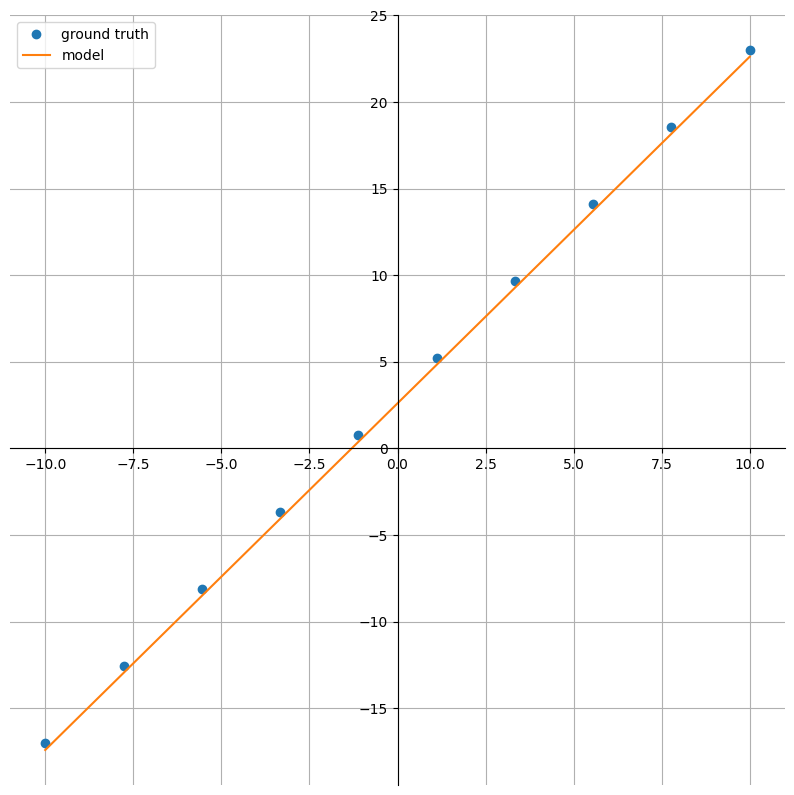

Epoch: 220; Train loss: 0.15158645808696747


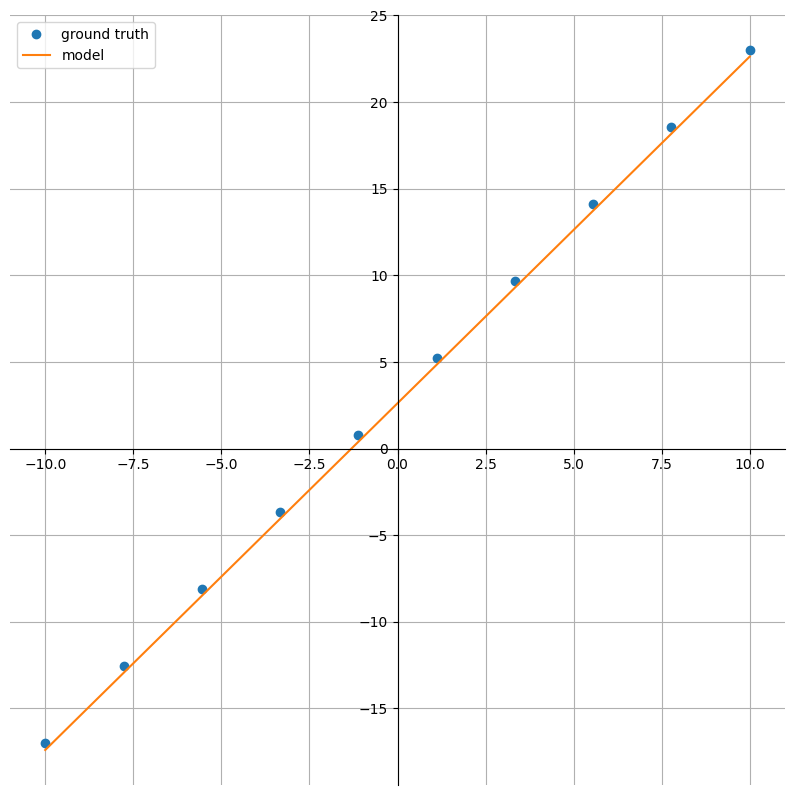

Epoch: 230; Train loss: 0.14563876390457153


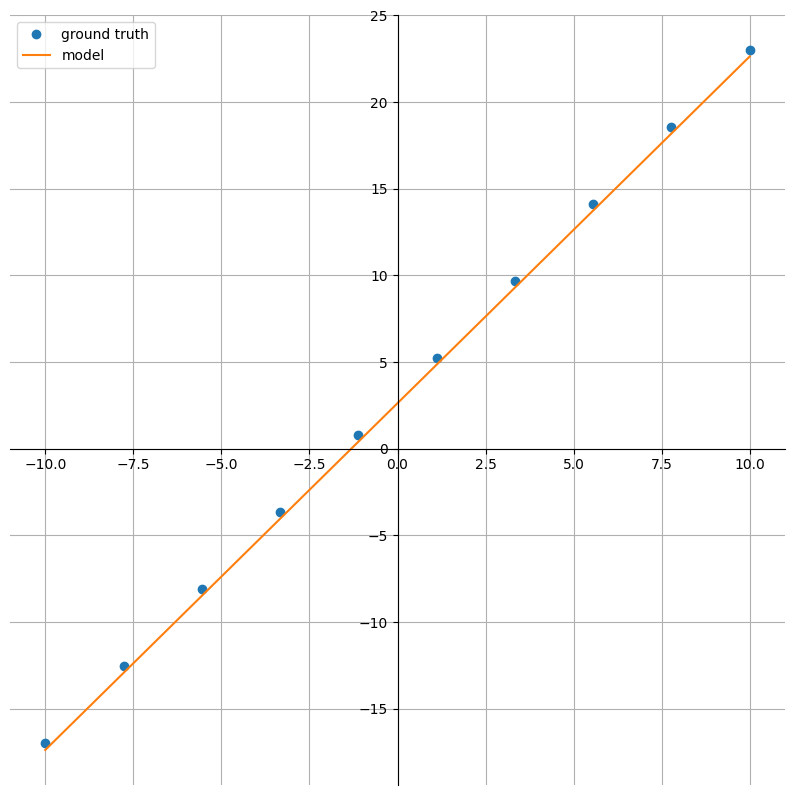

Epoch: 240; Train loss: 0.13992415368556976


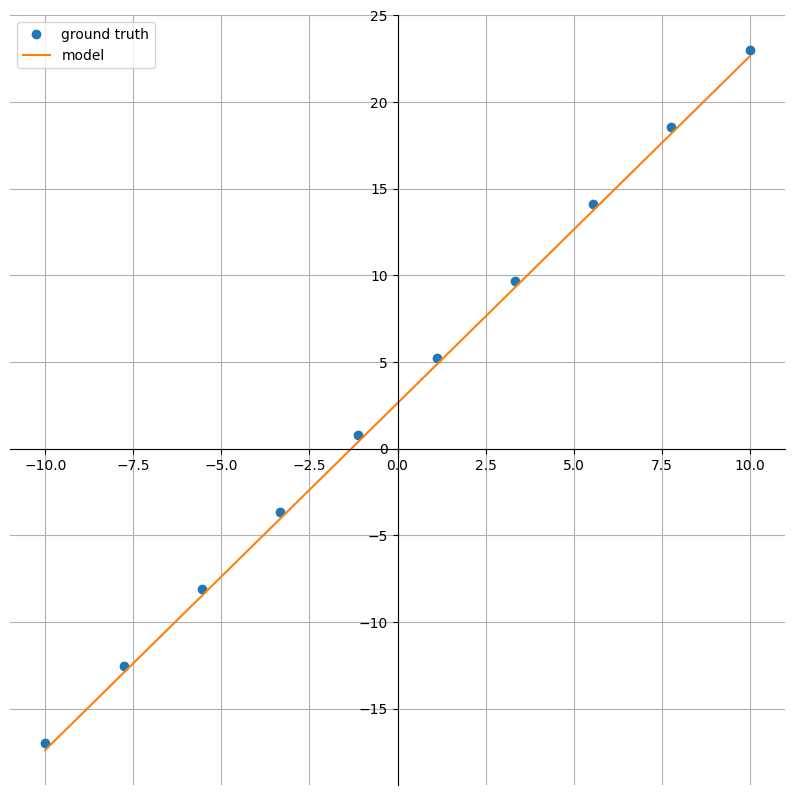

Epoch: 250; Train loss: 0.13443399965763092


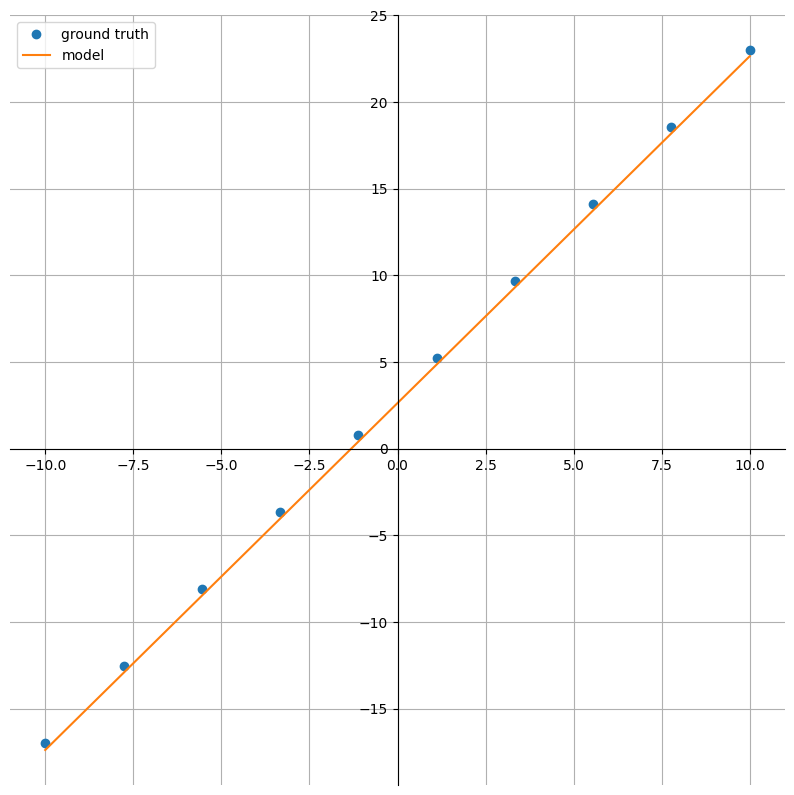

Epoch: 260; Train loss: 0.12915903329849243


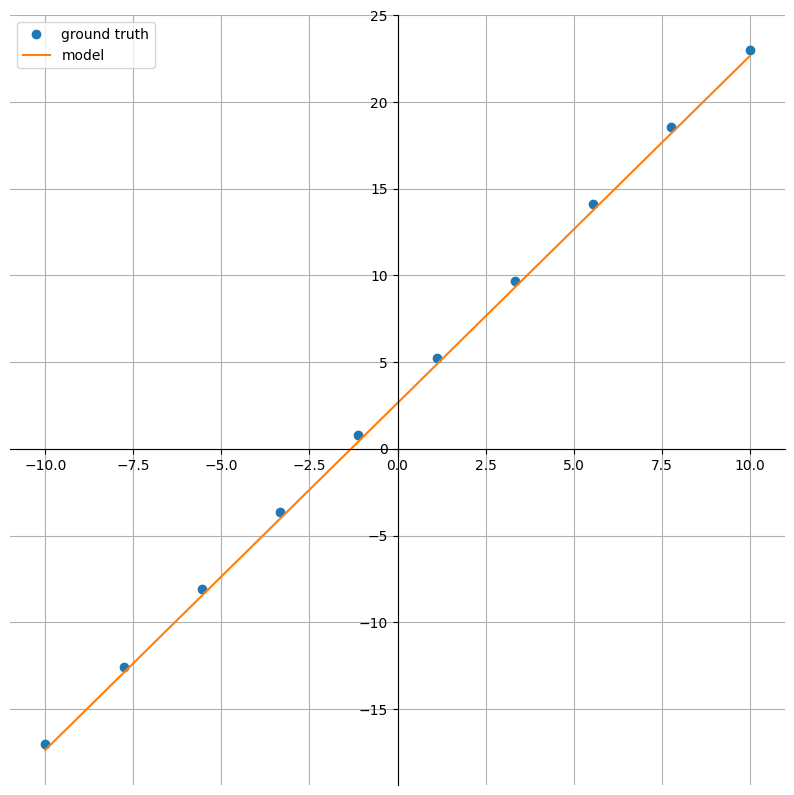

Epoch: 270; Train loss: 0.12409176677465439


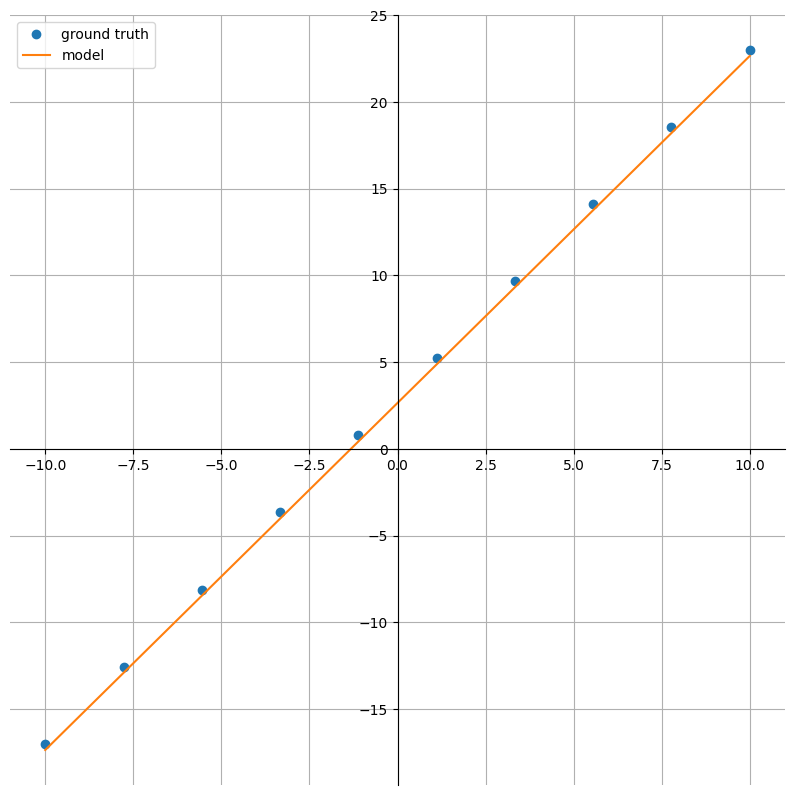

Epoch: 280; Train loss: 0.11922255158424377


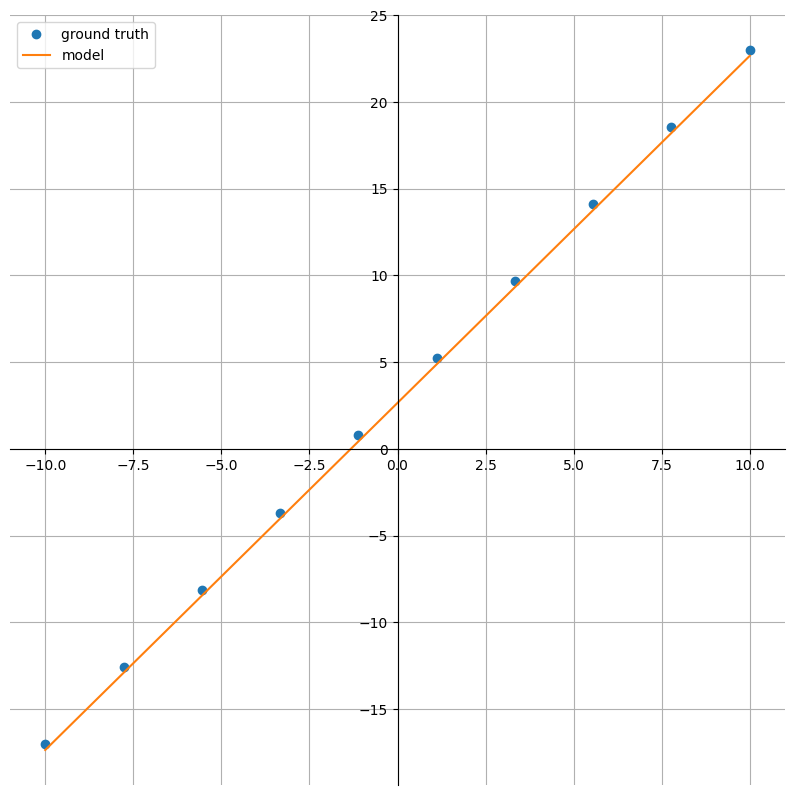

Epoch: 290; Train loss: 0.11454486101865768


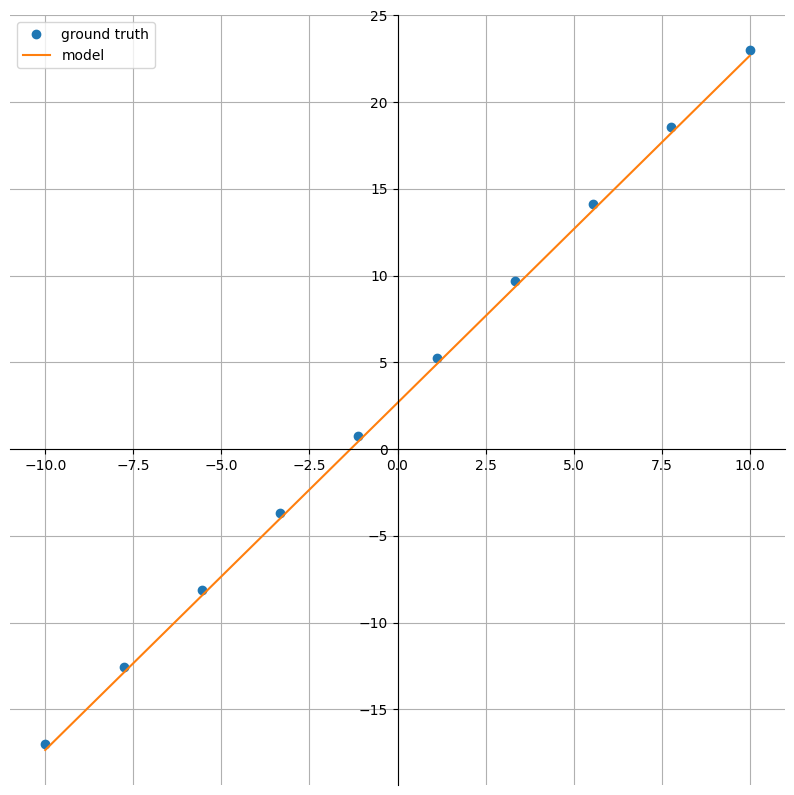

Epoch: 300; Train loss: 0.11005018651485443


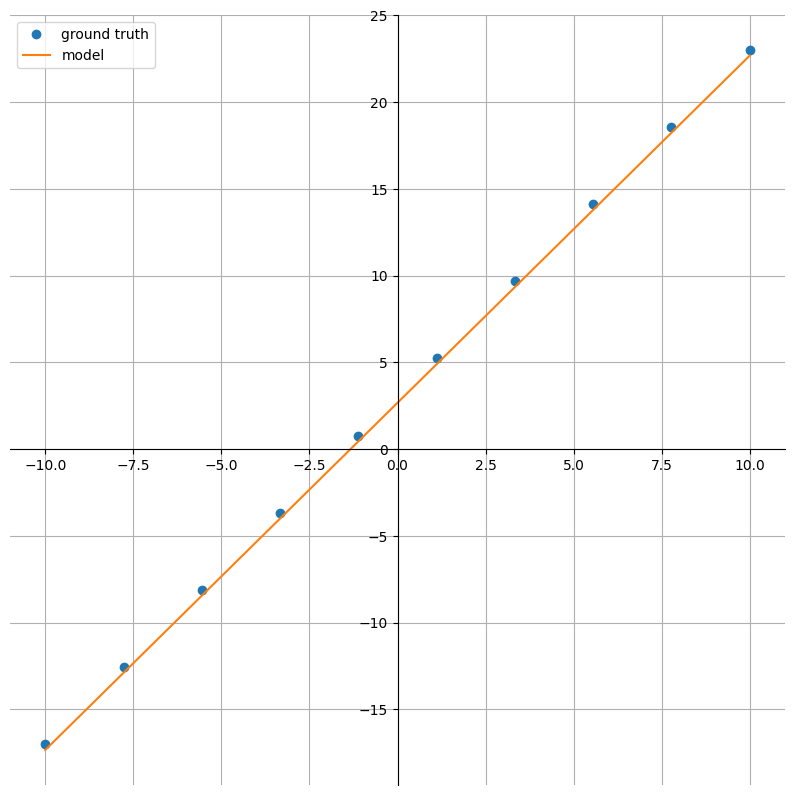

Epoch: 310; Train loss: 0.10573208332061768


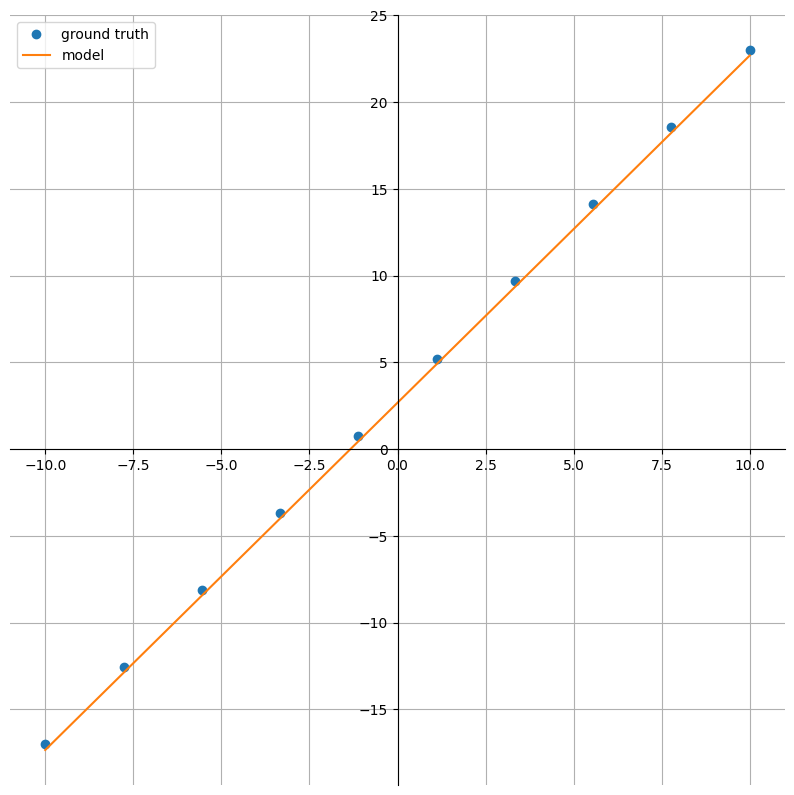

Epoch: 320; Train loss: 0.10158345103263855


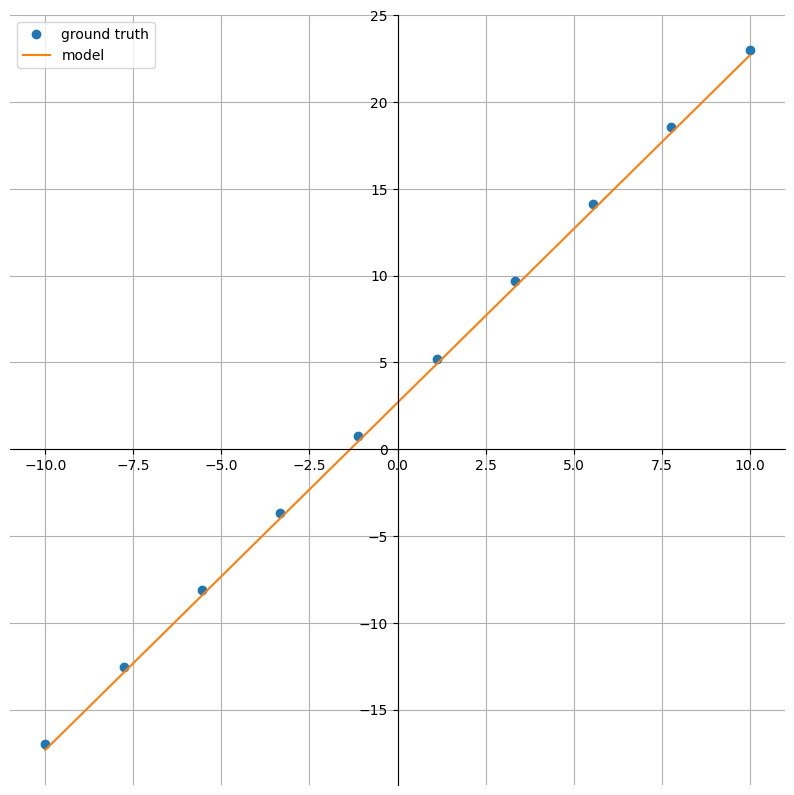

Epoch: 330; Train loss: 0.09759754687547684


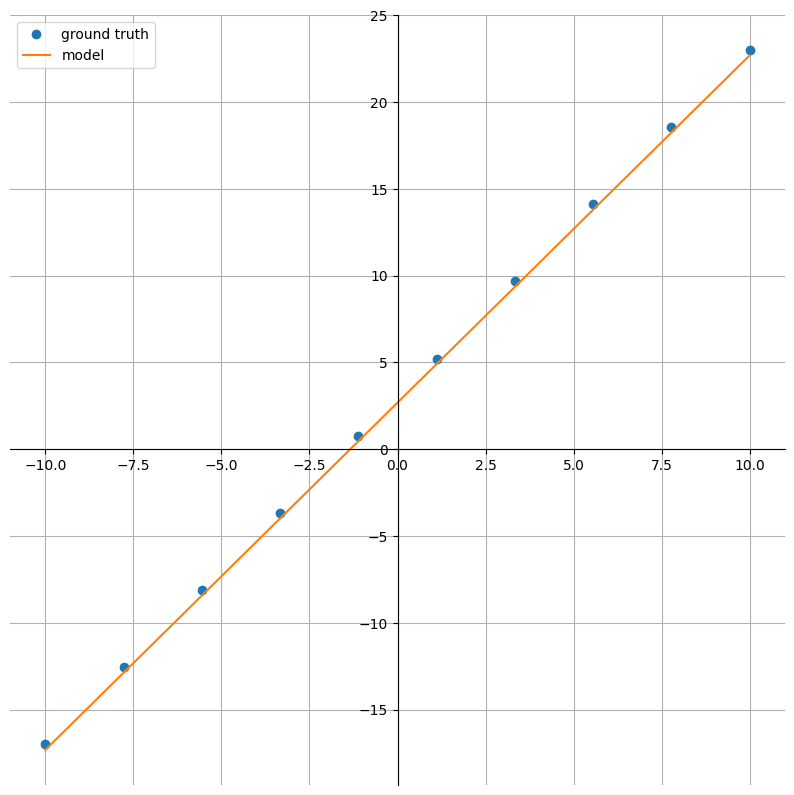

Epoch: 340; Train loss: 0.09376808255910873


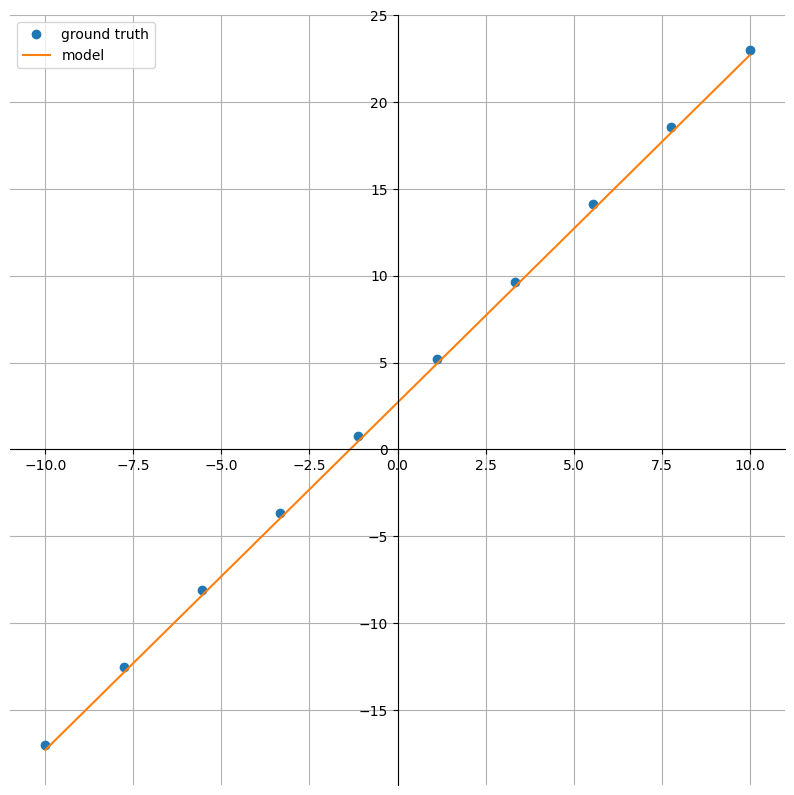

Epoch: 350; Train loss: 0.09008871763944626


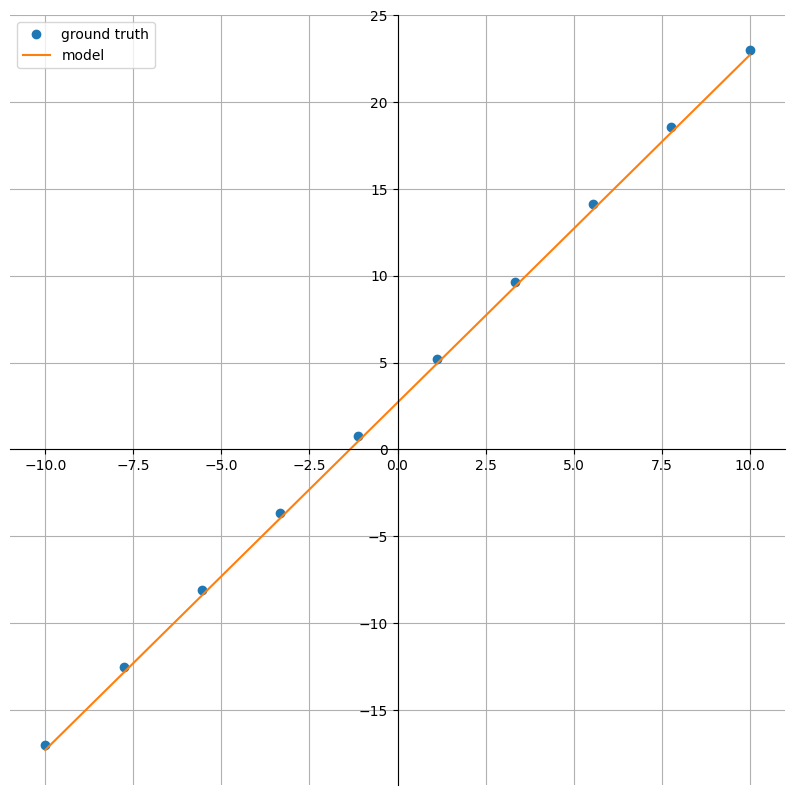

Epoch: 360; Train loss: 0.08655443787574768


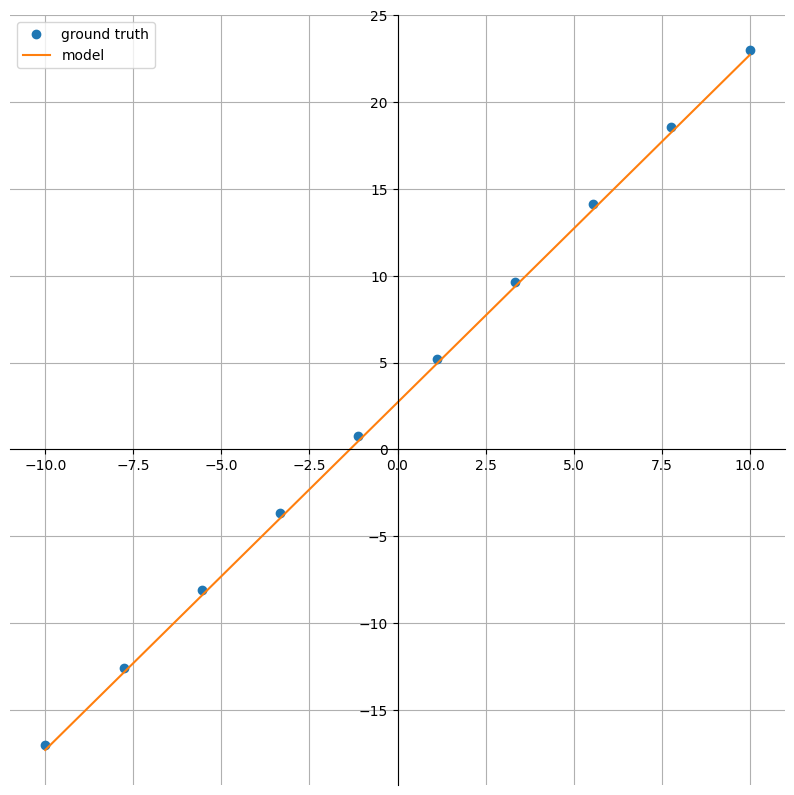

Epoch: 370; Train loss: 0.08315808326005936


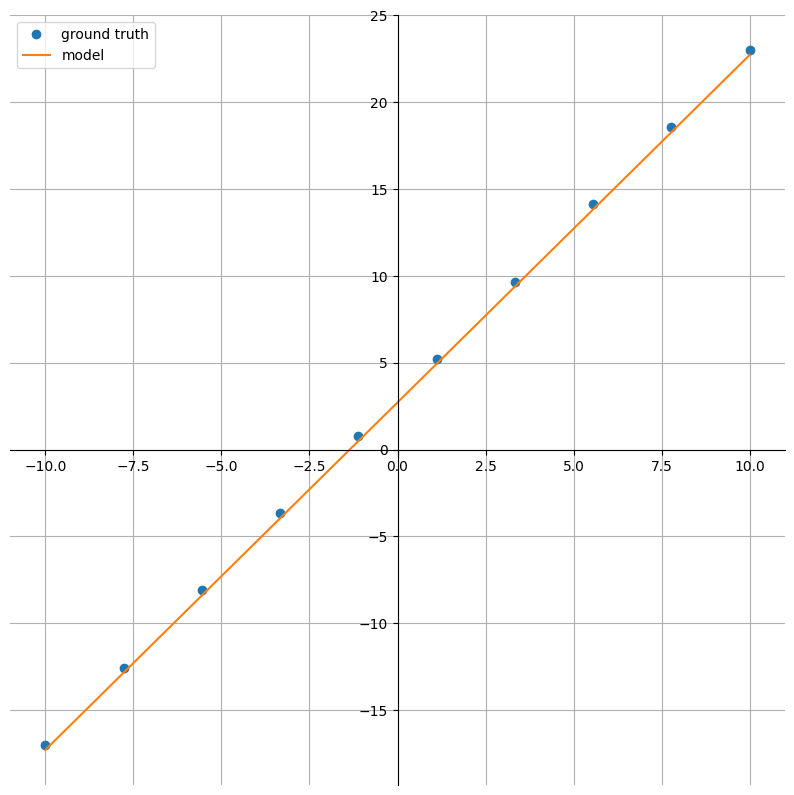

Epoch: 380; Train loss: 0.07989532500505447


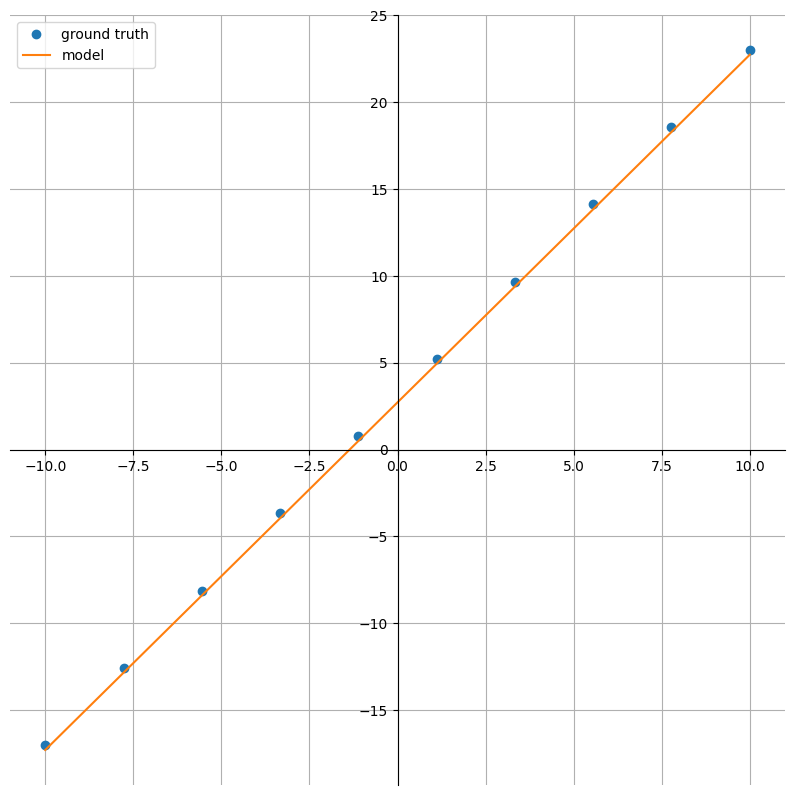

Epoch: 390; Train loss: 0.0767604187130928


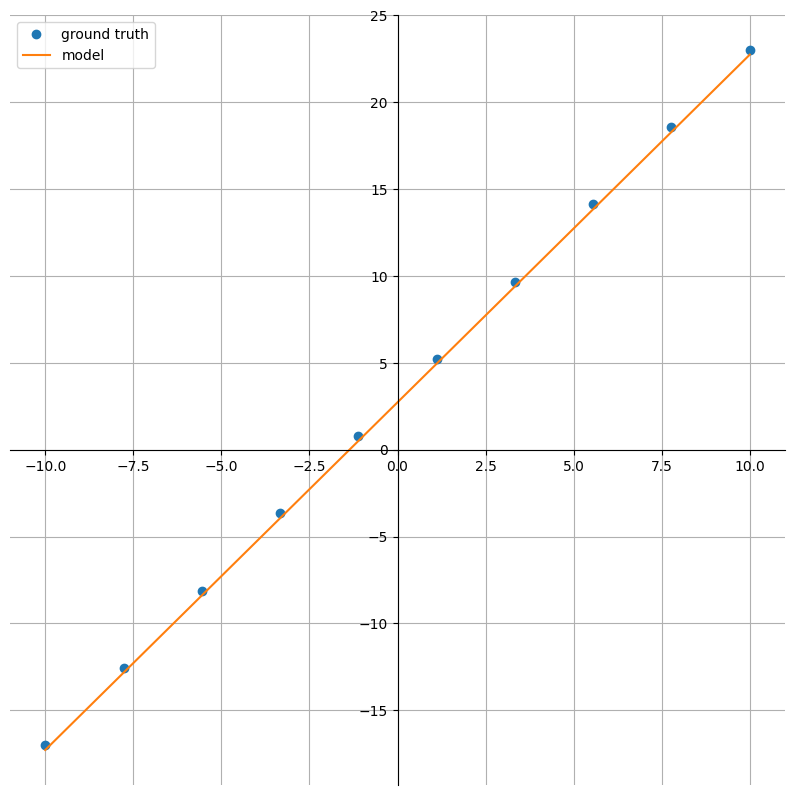

Epoch: 400; Train loss: 0.07374860346317291


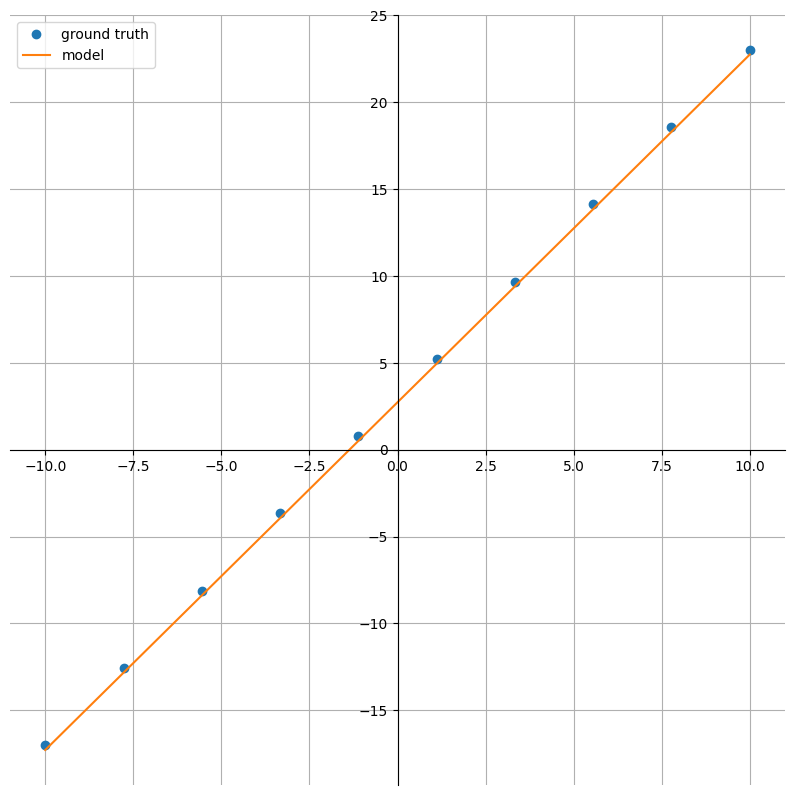

Epoch: 410; Train loss: 0.07085469365119934


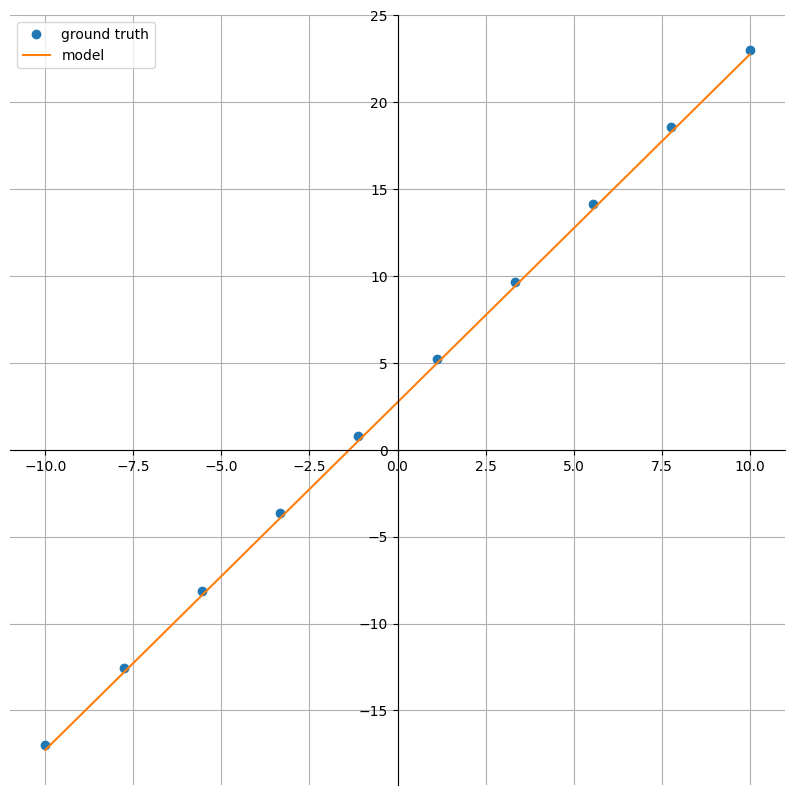

Epoch: 420; Train loss: 0.06807443499565125


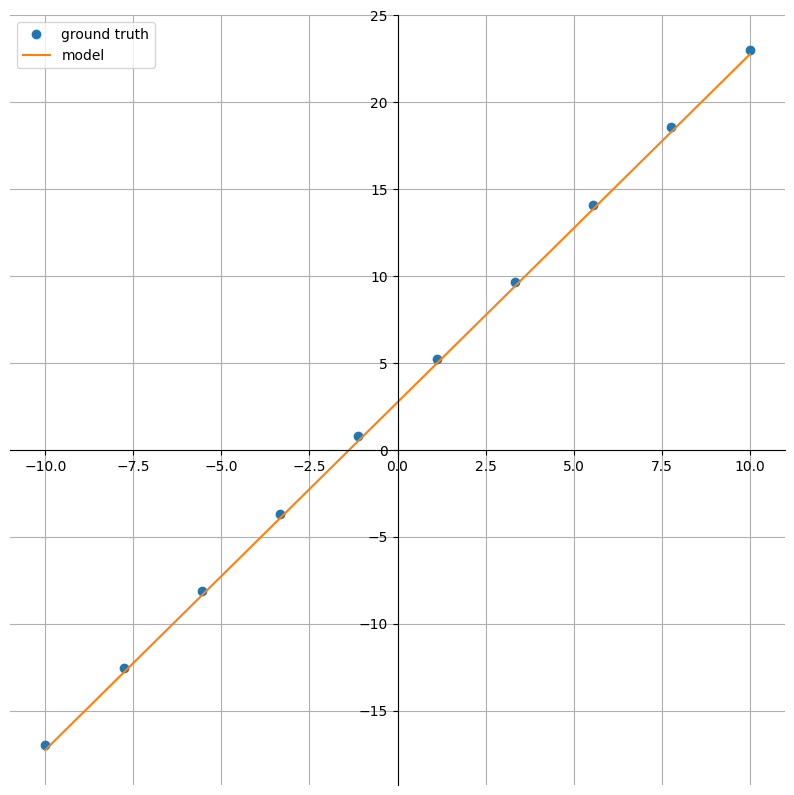

Epoch: 430; Train loss: 0.06540331244468689


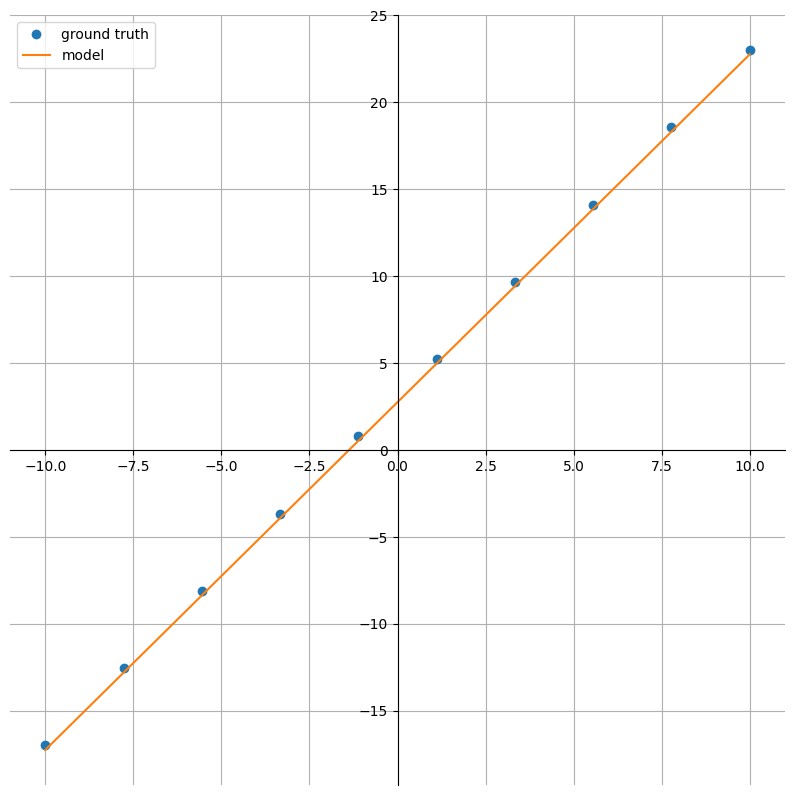

Epoch: 440; Train loss: 0.06283701211214066


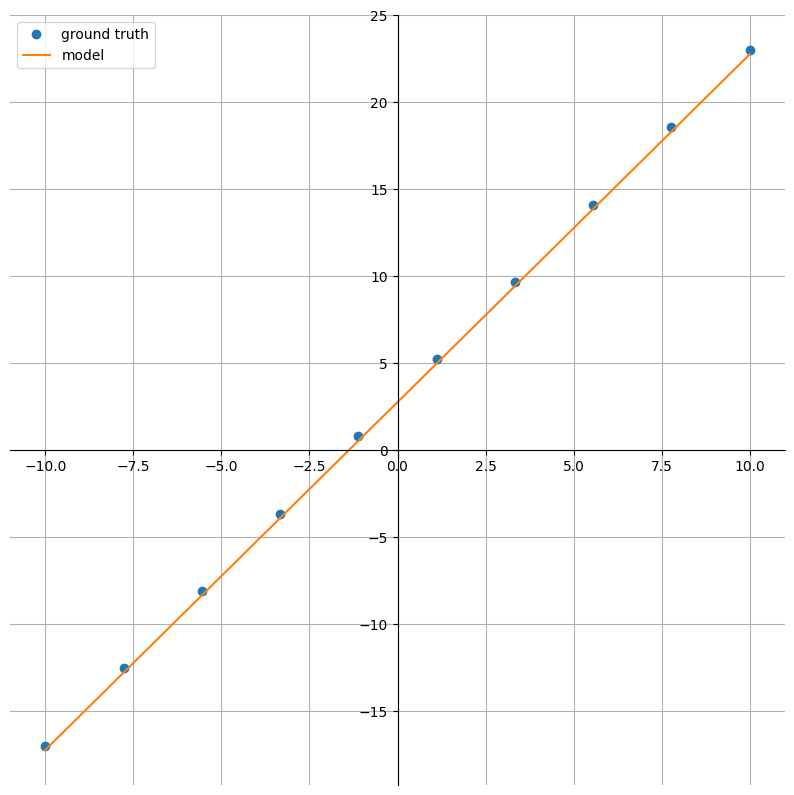

Epoch: 450; Train loss: 0.060371577739715576


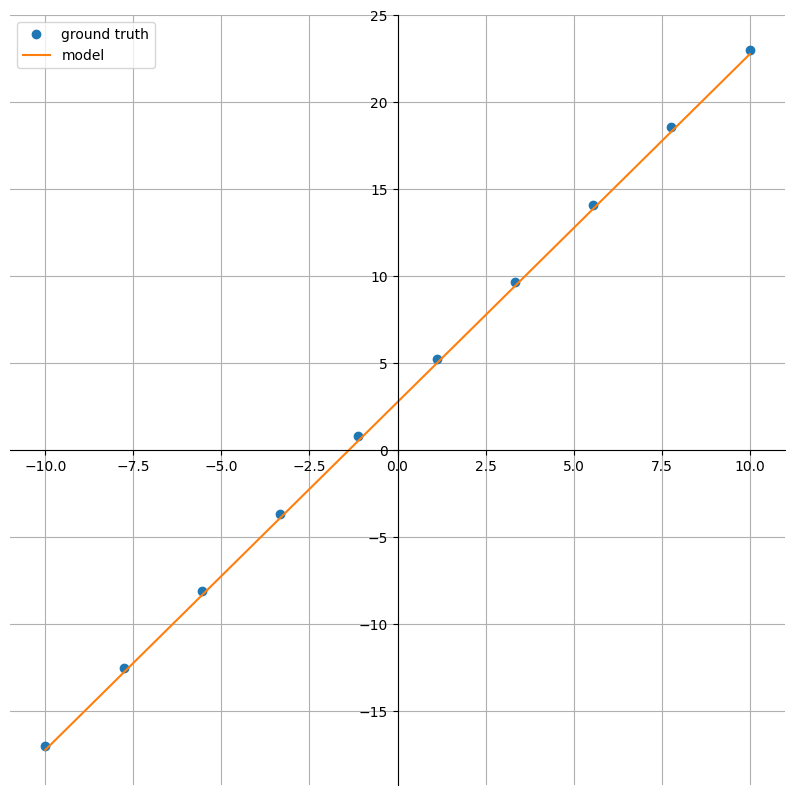

Test loss: 0.059489332139492035


In [32]:
epochs = 454
for t in range(epochs):
    train_loss = train(model, train_dataloader, loss_function, optimizer)
    if t % 10 == 0:
        print(f"Epoch: {t}; Train loss: {train_loss}")
        plot_comparinson(line, model)

test_loss = test(model, test_dataloader, loss_function)
print(f"Test loss: {test_loss}")